In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

Loading Dataset

In [ ]:
file_path = '/content/drive/My Drive/Classification_weather_data/daily_data.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [ ]:
data.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


**Chacking Null values.**

In [ ]:
data.isnull().sum()


day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64

In [ ]:
data['condition_text'].unique()


array([nan, 'Light Rain with Thunder', 'Clear and Sunny', 'Partly Cloudy',
       'Light Precipitation', 'Cloudy and Overcast', 'Mist or Fog',
       'Rain Showers', 'Moderate to Heavy Rain', 'Thunderstorms'],
      dtype=object)

In [ ]:
data['city_id'].nunique()

112

Cheak the number of rows

In [ ]:
num_rows = len(data)
print(f'Total number of rows in the dataset: {num_rows}')


Total number of rows in the dataset: 2893


Securing a non changed data frame


In [ ]:
new_df =data.copy()

In [ ]:
new_df.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


Converting Time to Minuits

In [ ]:
new_df['sunrise'] = pd.to_datetime(new_df['sunrise'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(new_df['sunrise'], format='%I:%M %p').dt.minute
new_df['sunset'] = pd.to_datetime(new_df['sunset'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(new_df['sunset'], format='%I:%M %p').dt.minute

Encode city_id s

In [ ]:
label_encoder = LabelEncoder()


new_df['city_id'] = label_encoder.fit_transform(new_df['city_id'])


In [ ]:
new_df.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,0,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,364,1159
1,D0002,0,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,365,1158
2,D0003,0,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,D0004,0,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
4,D0005,0,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,367,1155


Seperating Non Missing data Rows and Missing Data Rows

In [ ]:
data_non_missing = new_df[~new_df['condition_text'].isna()]
data_missing = new_df[new_df['condition_text'].isna()]

In [ ]:
data_non_missingn =data_non_missing.copy()

In [ ]:
data_non_missingndiff=data_non_missingn.copy()

Data Visualising

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

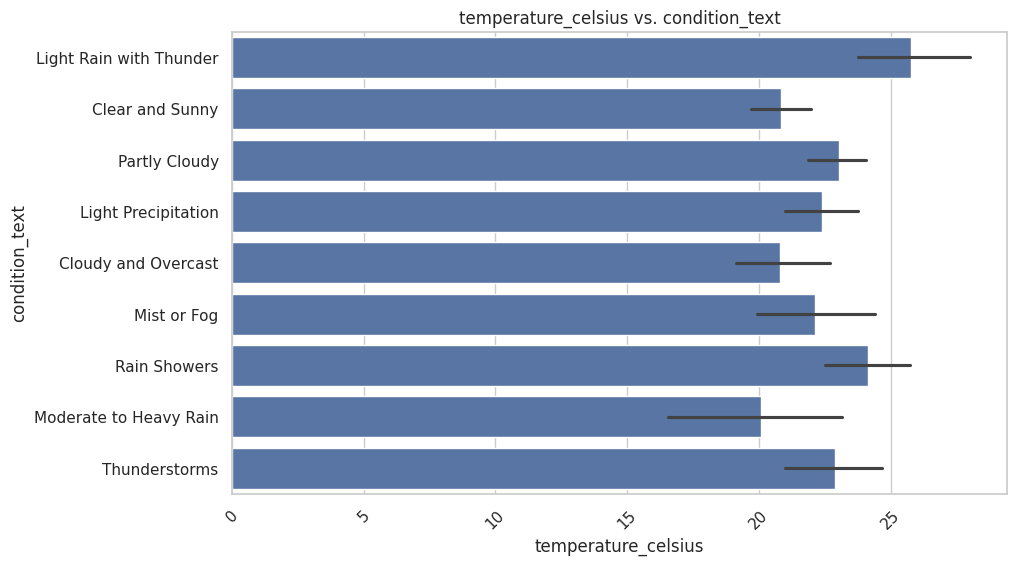

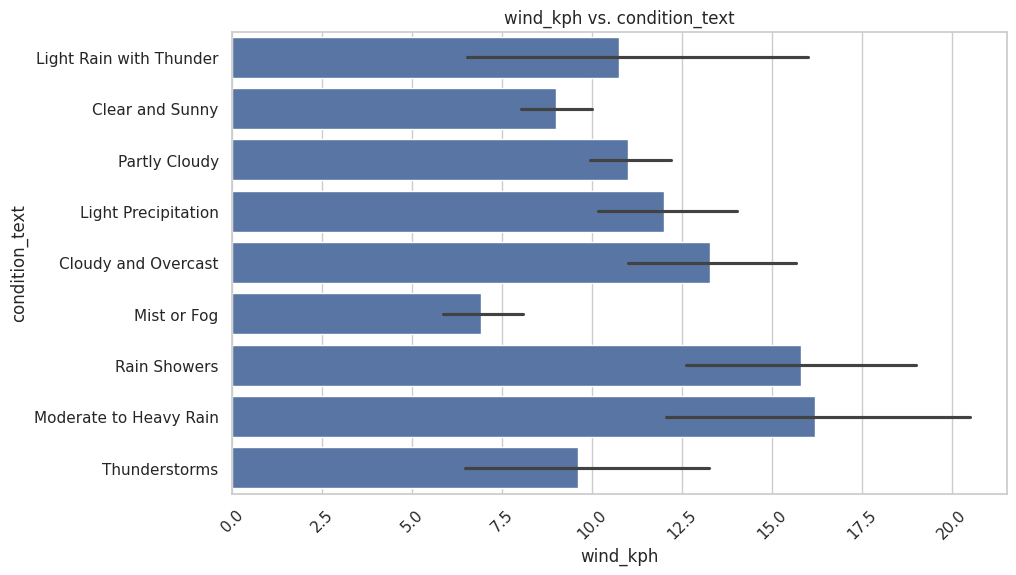

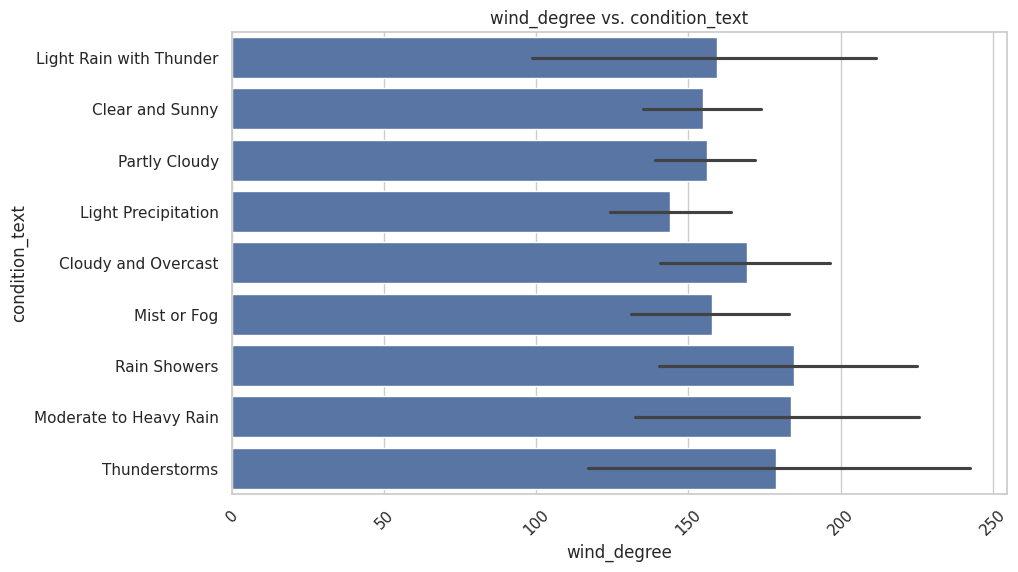

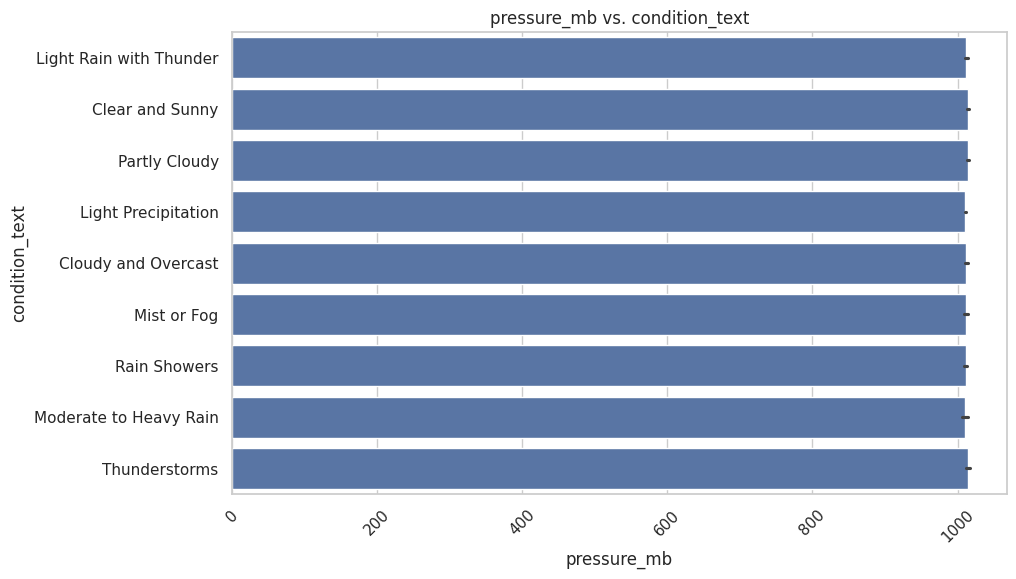

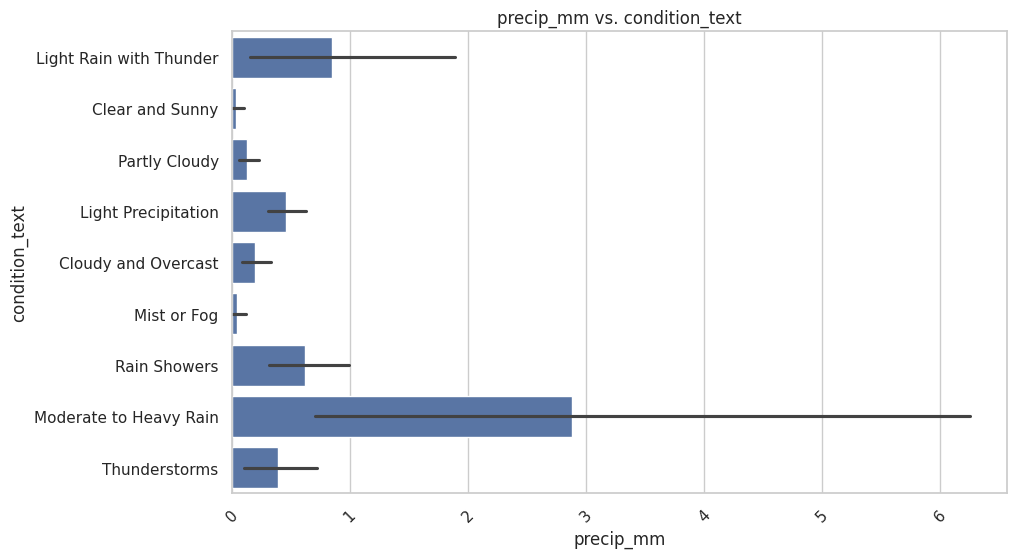

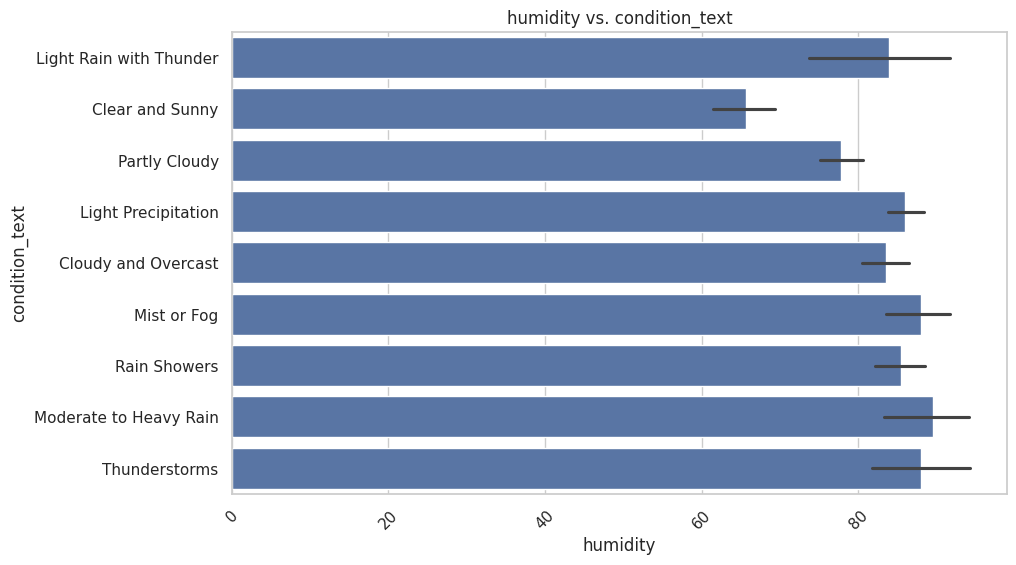

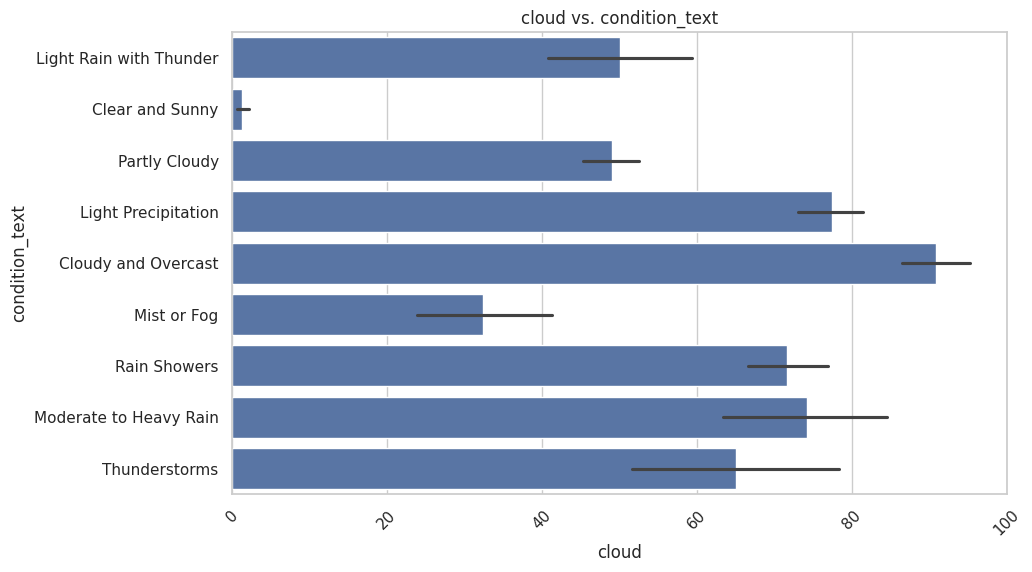

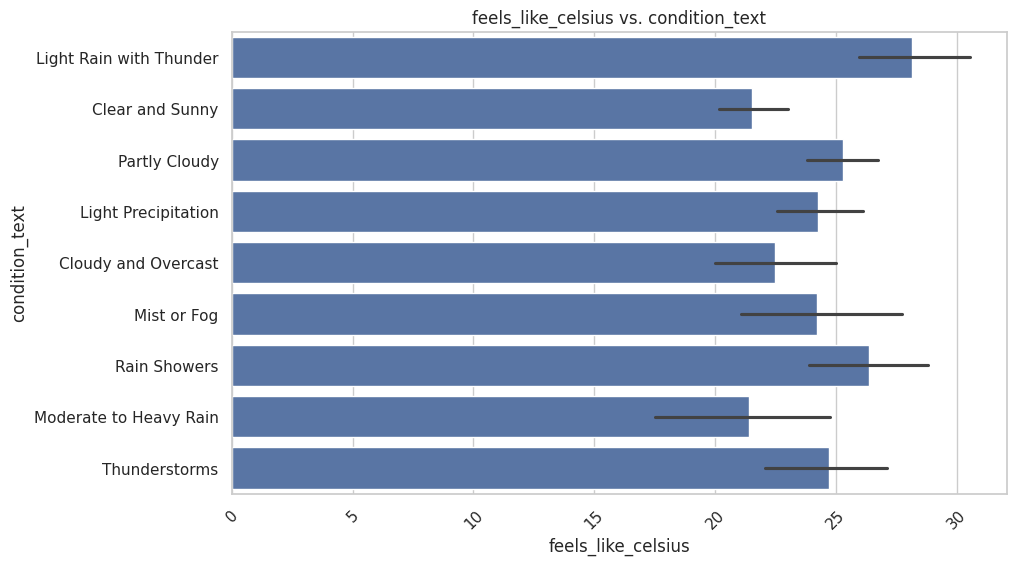

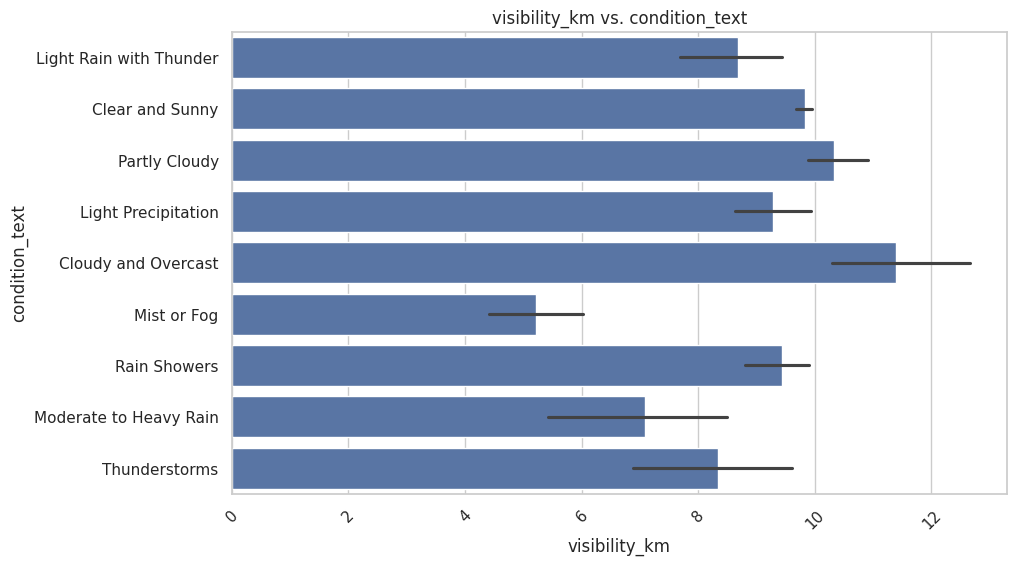

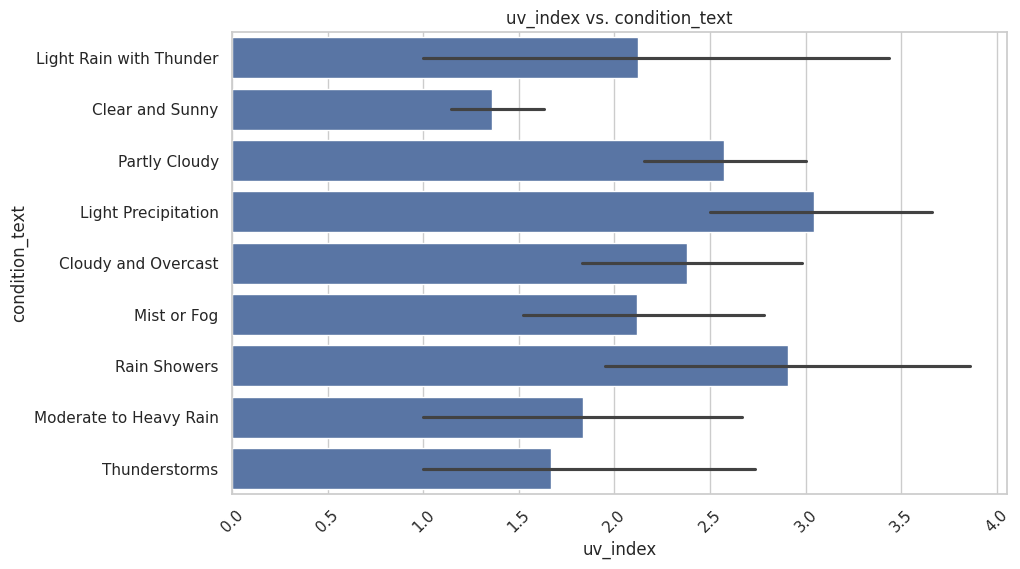

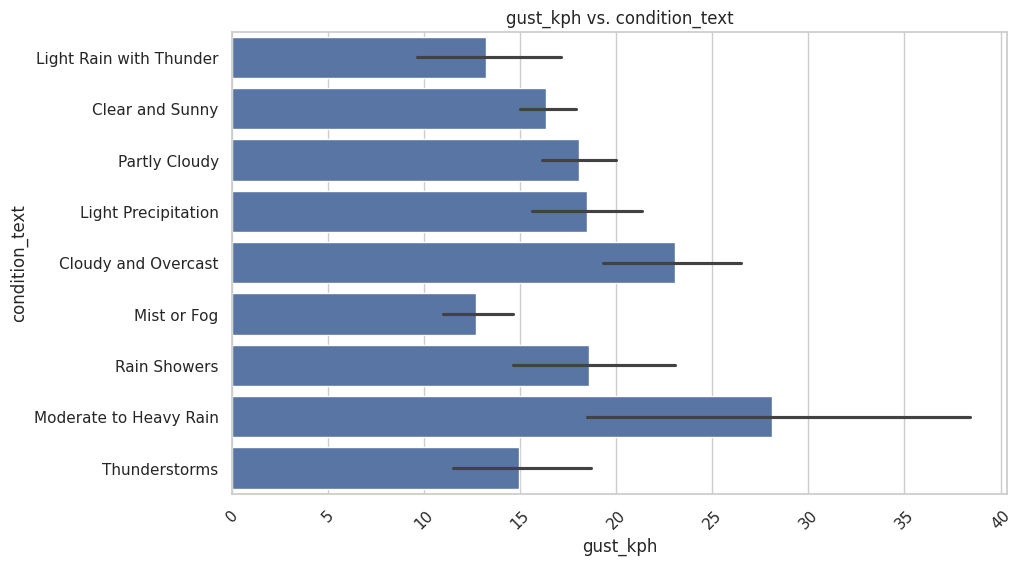

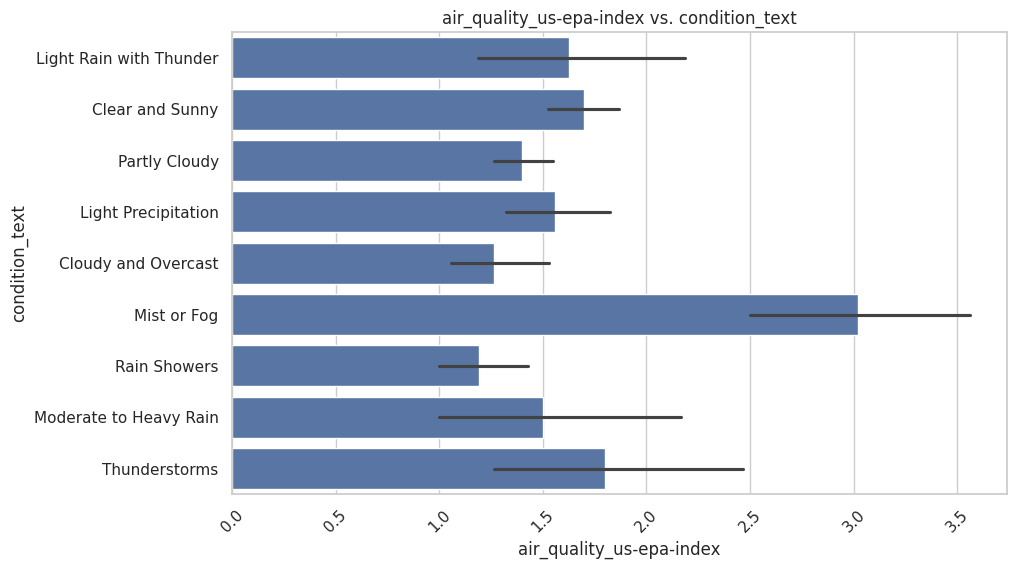

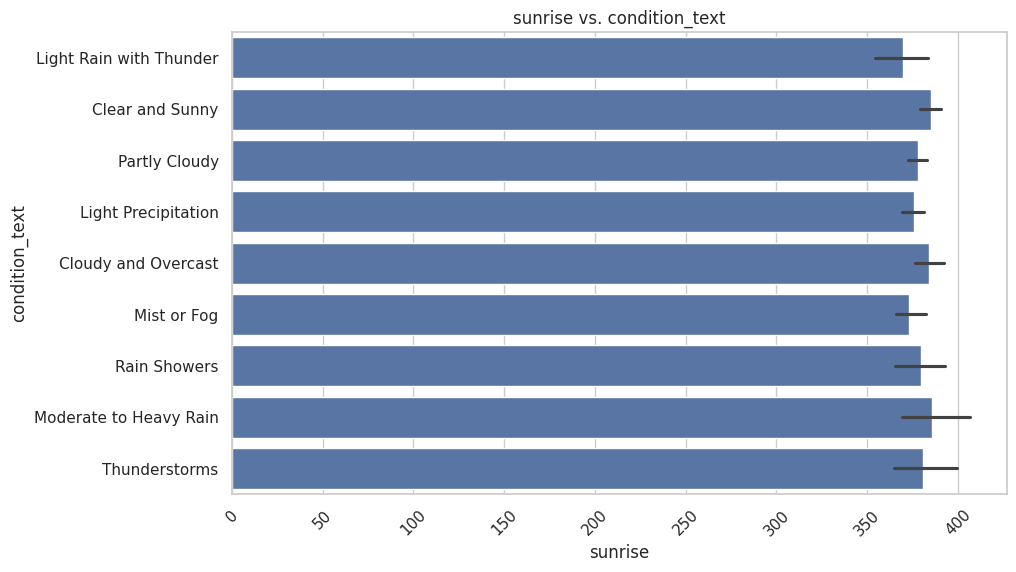

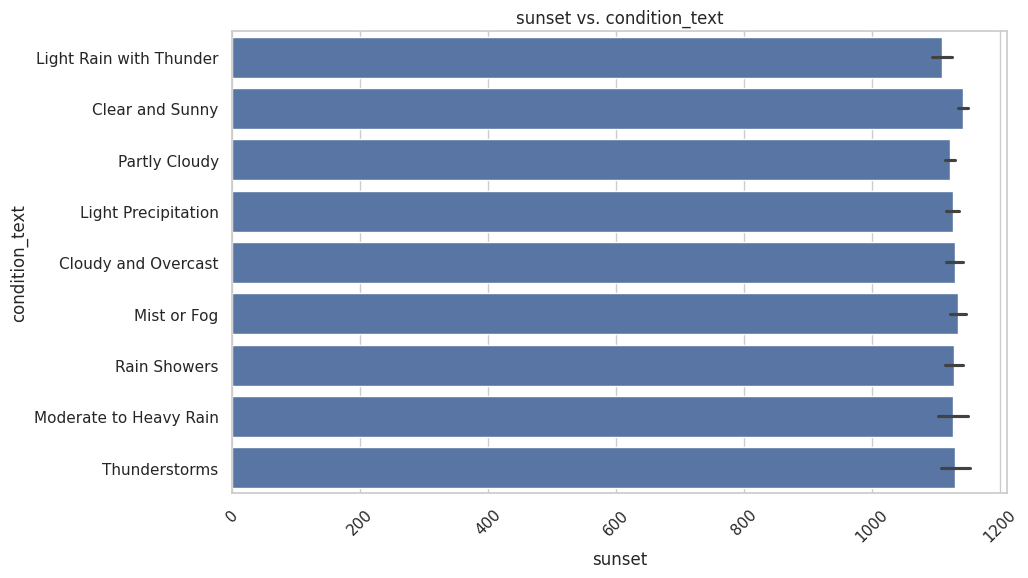

In [ ]:
sns.set(style="whitegrid")


features = ['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
            'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset']


for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data_non_missing[feature], y=data_non_missing['condition_text'])
    plt.title(f'{feature} vs. condition_text')
    plt.xlabel(feature)
    plt.ylabel('condition_text')
    plt.xticks(rotation=45)
    plt.show()

Encode city_id

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the condition_text column
data_non_missing['condition_text'] = label_encoder.fit_transform(data_non_missing['condition_text'])

In [ ]:
data_non_missing.head()


,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
2,D0003,0,20.0,3,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,D0004,0,17.0,0,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
6,D0007,0,21.0,6,4.0,310,1015.0,0.0,100,50,21.0,10.0,1.0,15.1,2,368,1151
18,D0019,0,19.0,0,3.6,64,1017.0,0.0,88,0,19.0,10.0,1.0,8.3,3,380,1131
27,D0028,1,19.0,6,3.6,83,1010.0,0.0,73,25,19.0,10.0,1.0,8.3,1,377,1160


In [ ]:
data_non_missing['condition_text'].nunique()

9

Start Training with sunset and sunrise columns

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data_non_missing.drop(columns=['condition_text', 'day_id','city_id',])  # Drop target and non-relevant columns
y = data_non_missing['condition_text']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set shape: X_val: {X_val.shape}, y_val: {y_val.shape}")

Training set shape: X_train: (383, 13), y_train: (383,)
Validation set shape: X_val: (96, 13), y_val: (96,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

Predicting

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.70


In [ ]:
X_missing = data_missing.drop(columns=['condition_text', 'day_id','city_id',])  # Drop target and non-relevant columns

# Predict the missing values
data_missing['condition_text'] = model.predict(X_missing)

# Decode the predicted labels back to original text
data_missing['condition_text'] = label_encoder.inverse_transform(data_missing['condition_text'])

In [ ]:
# Combine the original non-missing data with the predicted missing data
combined_data = pd.concat([data_non_missingn, data_missing], axis=0)

# Sort by day_id to match the submission format
combined_data = combined_data.sort_values(by='day_id')

# Prepare the submission DataFrame
submission_df = combined_data[['day_id', 'condition_text']]

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

In [ ]:
import pandas as pd

# Read the submission CSV file
submission_df = pd.read_csv('submission.csv')

# Display the first few rows to inspect the contents
print(submission_df.head())

Create data frames with sunrise sunset time difference coloumn instead of sunrise coloumn and sunset column

In [ ]:
data_non_missing['sunrise_sunset_diff'] = data_non_missing['sunset'] - data_non_missing['sunrise']

# Drop the original sunrise and sunset columns
data_non_missing.drop(columns=['sunrise', 'sunset'], inplace=True)

In [ ]:
data_non_missingndiff['sunrise_sunset_diff'] = data_non_missingndiff['sunset'] - data_non_missingndiff['sunrise']

# Drop the original sunrise and sunset columns
data_non_missingndiff.drop(columns=['sunrise', 'sunset'], inplace=True)

In [ ]:
data_non_missing.head()

In [ ]:
data_non_missingdiff =data_non_missing.copy()

Start Training with sunrise sunrise difference coloumn

In [ ]:
X = data_non_missing.drop(columns=['condition_text', 'day_id', 'city_id'])
y = data_non_missing['condition_text']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set shape: X_val: {X_val.shape}, y_val: {y_val.shape}")

In [ ]:
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.71


In [ ]:
# Predict missing values
X_missing = data_missing.drop(columns=['condition_text', 'day_id', 'city_id'])

X_missing['sunrise_sunset_diff'] = X_missing['sunset'] - X_missing['sunrise']
X_missing.drop(columns=['sunrise', 'sunset'], inplace=True)

data_missing['condition_text'] = model.predict(X_missing)

# Inverse transform the encoded predictions to original text labels
data_missing['condition_text'] = label_encoder.inverse_transform(data_missing['condition_text'])

# Prepare submission
combined_data = pd.concat([data_non_missingndiff, data_missing], axis=0)
combined_data = combined_data.sort_values(by='day_id')
submission_df = combined_data[['day_id', 'condition_text']]
submission_df.to_csv('submission_with_sunrise_sunset.csv', index=False)


In [ ]:
import pandas as pd

# Read the submission CSV file
submission_df = pd.read_csv('submission.csv')

# Display the first few rows to inspect the contents
print(submission_df())

In [ ]:
import pandas as pd

# Read the submission CSV file
submission_df = pd.read_csv('submission_with_sunrise_sunset.csv')

# Display all rows and columns to inspect the entire contents
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(submission_df)

In [ ]:
from google.colab import files

# Assuming 'submission.csv' is the name of your file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>